In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv("food-allergy-analysis-Zenodo (1).csv")


In [ ]:
df.head

In [ ]:
# Create two separate datasets for children with and without Medicaid
import statsmodels.api as sm

medicaid_data = df[df['MEDICAID_FACTOR'] == 'P1']
non_medicaid_data = df[df['MEDICAID_FACTOR'] == 'P0']

# Calculate the proportions of food allergy diagnosis in each dataset
food_allergy_columns = ['SHELLFISH_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'ASTHMA_START', 'SOY_ALG_START', 'MILK_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START']
medicaid_allergy = medicaid_data[food_allergy_columns].notna().sum().sum() / len(medicaid_data)
non_medicaid_allergy = non_medicaid_data[food_allergy_columns].notna().sum().sum() / len(non_medicaid_data)

# Perform a two-proportion z-test
z, p_value = sm.stats.proportions_ztest([medicaid_allergy, non_medicaid_allergy], [len(medicaid_data), len(non_medicaid_data)])
print(z)
alpha = 0.05
print(f"Hypothesis 1: p-value = {p_value:.5f}")
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

0.48085040861063877
Hypothesis 1: p-value = 0.63062
Fail to reject the null hypothesis.


In [ ]:
# Create two separate datasets for minority and non-minority children
minority_data = df[df['RACE_FACTOR'] != 'R0']
non_minority_data = df[df['RACE_FACTOR'] == 'R0']

# Calculate the proportions of food allergy diagnosis in each dataset
minority_allergy = minority_data[food_allergy_columns].notna().sum().sum() / len(minority_data)
non_minority_allergy = non_minority_data[food_allergy_columns].notna().sum().sum() / len(non_minority_data)

# Perform a two-proportion z-test
z, p_value = sm.stats.proportions_ztest([minority_allergy, non_minority_allergy], [len(minority_data), len(non_minority_data)])

alpha = 0.05
print(f"Hypothesis 2: p-value = {p_value:.5f}")
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")



Hypothesis 2: p-value = 0.57736
Fail to reject the null hypothesis.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency



# Create a list of all the allergy columns
allergies = ['SHELLFISH_ALG_START', 'EGG_ALG_START', 'MILK_ALG_START', 'PEANUT_ALG_START',
             'FISH_ALG_START', 'SOY_ALG_START', 'WHEAT_ALG_START', 'SESAME_ALG_START',
             'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'ASTHMA_START']

# Create a function to classify the age range
def age_range(age):
    if age < 1:
        return '0-1'
    elif age < 3:
        return '1-3'
    elif age < 6:
        return '3-6'
    elif age < 10:
        return '6-10'
    else:
        return '10-18'

# Create a new DataFrame to store the allergy occurrence and the age range
allergy_age_df = pd.DataFrame(columns=['allergy', 'age_range'])

# Iterate through each allergy and record the age range of each occurrence
for allergy in allergies:
    temp_df = df[['SUBJECT_ID', allergy]].dropna()
    temp_df['age_range'] = temp_df[allergy].apply(age_range)
    temp_df['allergy'] = allergy
    allergy_age_df = allergy_age_df.append(temp_df[['allergy', 'age_range']], ignore_index=True)

# Create a contingency table
contingency_table = pd.crosstab(allergy_age_df['allergy'], allergy_age_df['age_range'])

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square: {chi2}, p-value: {p_value}')



Chi-Square: 24802.118086903884, p-value: 0.0


<ipython-input-8-5f00f9d2bb36>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allergy_age_df = allergy_age_df.append(temp_df[['allergy', 'age_range']], ignore_index=True)
<ipython-input-8-5f00f9d2bb36>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allergy_age_df = allergy_age_df.append(temp_df[['allergy', 'age_range']], ignore_index=True)
<ipython-input-8-5f00f9d2bb36>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allergy_age_df = allergy_age_df.append(temp_df[['allergy', 'age_range']], ignore_index=True)
<ipython-input-8-5f00f9d2bb36>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allergy_age_df = allergy_age_df.append(te

In [ ]:
# Create a list of all the allergy columns with their corresponding end columns
allergies_start_end = [('SHELLFISH_ALG_START', 'SHELLFISH_ALG_END'), ('EGG_ALG_START', 'EGG_ALG_END'),
                       ('MILK_ALG_START', 'MILK_ALG_END'), ('PEANUT_ALG_START', 'PEANUT_ALG_END'),
                       ('FISH_ALG_START', 'FISH_ALG_END'), ('SOY_ALG_START', 'SOY_ALG_END'),
                       ('WHEAT_ALG_START', 'WHEAT_ALG_END'), ('SESAME_ALG_START', 'SESAME_ALG_END'),
                       ('TREENUT_ALG_START', 'TREENUT_ALG_END'), ('WALNUT_ALG_START', 'WALNUT_ALG_END'),
                       ('PECAN_ALG_START', 'PECAN_ALG_END'), ('ASTHMA_START', 'ASTHMA_END')]

# Initialize the maximum duration and the corresponding disease
max_duration = 0
max_duration_disease = ''

# Iterate through each allergy and calculate the duration
for allergy_start, allergy_end in allergies_start_end:
    temp_df = df[[allergy_start, allergy_end]].dropna()
    temp_df['duration'] = temp_df[allergy_end] - temp_df[allergy_start]
    max_temp_duration = temp_df['duration'].max()

    # Update the maximum duration and corresponding disease if needed
    if max_temp_duration > max_duration:
        max_duration = max_temp_duration
        max_duration_disease = allergy_start

# Print the disease with the longest time range
print(f'The disease with the longest time range is {max_duration_disease} with a duration of {max_duration} years.')


The disease with the longest time range is ASTHMA_START with a duration of 20.249144422 years.


In [ ]:
# Calculate the number of children with food allergies and asthma
food_allergy_count = df[food_allergy_columns].notna().sum().sum()
asthma_count = df['ASTHMA_START'].notna().sum()

# Perform a two-proportion z-test
z, p_value = sm.stats.proportions_ztest([food_allergy_count, asthma_count], [len(df), len(df)])

alpha = 0.05
print(f"Hypothesis 4: p-value = {p_value:.5f}")
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Hypothesis 4: p-value = 0.00000
Reject the null hypothesis.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your data into a DataFrame named 'df'

# Create a food allergy column
food_allergy_columns = ['SHELLFISH_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'ASTHMA_START', 'SOY_ALG_START', 'MILK_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START']
df['FOOD_ALLERGY'] = df[food_allergy_columns].notna().any(axis=1)

# Create an asthma column
df['ASTHMA'] = df['ASTHMA_START'].notna()

# Calculate the number of children with food allergies and asthma
num_food_allergies = df['FOOD_ALLERGY'].sum()
num_asthma = df['ASTHMA'].sum()

# Calculate the total number of children in the dataset
num_children = len(df)

# Calculate proportions of children with food allergies and asthma
prop_food_allergies = num_food_allergies / num_children
prop_asthma = num_asthma / num_children

# Calculate the pooled proportion
pooled_prop = (num_food_allergies + num_asthma) / (2 * num_children)

# Calculate the standard error
se = np.sqrt(pooled_prop * (1 - pooled_prop) * (1 / num_children + 1 / num_children))

# Calculate the z-statistic
z_stat = (prop_food_allergies - prop_asthma) / se

# Calculate the p-value using the z-statistic
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")


Z-statistic: 31.477305634854197
P-value: 0.0


In [ ]:
import numpy as np

# Calculate proportions of children with food allergies and asthma
prop_food_allergies = num_food_allergies / num_children
prop_asthma = num_asthma / num_children

# Calculate Cohen's h
cohens_h = np.abs(np.arcsin(np.sqrt(prop_food_allergies)) - np.arcsin(np.sqrt(prop_asthma)))

print(f"Cohen's h: {cohens_h}")


Cohen's h: 0.03858393697265167


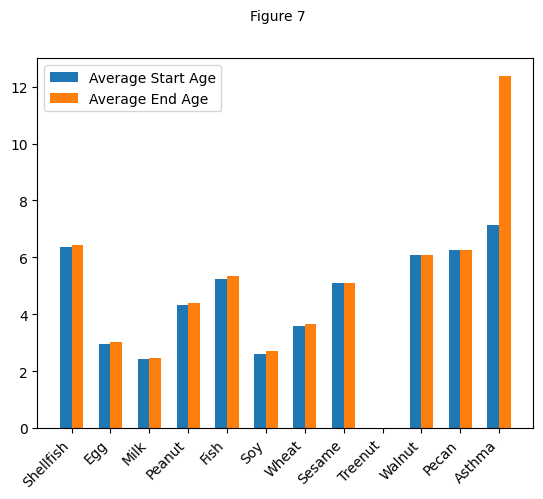

In [ ]:
import matplotlib.pyplot as plt

# Create a list of all the allergy columns with their corresponding end columns
allergies_start_end = [('SHELLFISH_ALG_START', 'SHELLFISH_ALG_END'), ('EGG_ALG_START', 'EGG_ALG_END'),
                       ('MILK_ALG_START', 'MILK_ALG_END'), ('PEANUT_ALG_START', 'PEANUT_ALG_END'),
                       ('FISH_ALG_START', 'FISH_ALG_END'), ('SOY_ALG_START', 'SOY_ALG_END'),
                       ('WHEAT_ALG_START', 'WHEAT_ALG_END'), ('SESAME_ALG_START', 'SESAME_ALG_END'),
                       ('TREENUT_ALG_START', 'TREENUT_ALG_END'), ('WALNUT_ALG_START', 'WALNUT_ALG_END'),
                       ('PECAN_ALG_START', 'PECAN_ALG_END'), ('ASTHMA_START', 'ASTHMA_END')]

# Initialize the lists for average start age and end age
avg_start_age = []
avg_end_age = []

# Iterate through each allergy and calculate the average start age and end age
for allergy_start, allergy_end in allergies_start_end:
    temp_df = df[[allergy_start, allergy_end]].dropna()
    avg_start = temp_df[allergy_start].mean()
    avg_end = temp_df[allergy_end].mean()
    avg_start_age.append(avg_start)
    avg_end_age.append(avg_end)

# Create a double line bar graph
x = range(12)
width = 0.3
fig, ax = plt.subplots()
ax.bar(x, avg_start_age, width, label='Average Start Age')
ax.bar([i+width for i in x], avg_end_age, width, label='Average End Age')
ax.set_xticks([i+width/2 for i in x])
ax.set_xticklabels(['Shellfish', 'Egg', 'Milk', 'Peanut', 'Fish', 'Soy', 'Wheat', 'Sesame', 'Treenut', 'Walnut', 'Pecan', 'Asthma'], rotation=45, ha='right')
ax.legend()

# Add a caption
fig.text(0.5, 0.96, 'Figure 7', ha='center')

plt.show()

